<a href="https://colab.research.google.com/github/LudwigMeder/Time-Series-Prediction-of-the-NAO/blob/main/1_DatasetCharacteristics/exploratory_data_analysis_NAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

NAO index from Climate Research Unit (UK) -> https://crudata.uea.ac.uk/cru/data/nao/index.htm

Main reference to cite when using this NAO index:

Jones, P.D., Jónsson, T. and Wheeler, D., 1997: Extension to the North Atlantic Oscillation using early instrumental pressure observations from Gibraltar and South-West Iceland. Int. J. Climatol. 17, 1433-1450. doi: 10.1002/(SICI)1097-0088(19971115)17:13<1433::AID-JOC203>3.0.CO;2-P

"The NAO is traditionally defined as the normalized pressure difference between a station on the Azores and one on Iceland." For more information on how the index is calculated see : https://crudata.uea.ac.uk/cru/data/nao/CRU_index_calculation.pdf

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [6]:
import pandas as pd

# Load the data
df = pd.read_csv('https://crudata.uea.ac.uk/cru/data/nao/nao_3dp.dat',skiprows=[0,1,2,3,-1], delim_whitespace=True, header=None)
#df = pd.read_csv('https://crudata.uea.ac.uk/cru/data/nao/nao_3dp.dat')
df = df.drop(199)
new_column_names = ['Year', 'January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','Annual_mean']
df.columns = new_column_names


print(df.head())
print(df.tail())


   Year  January  February  March  April    May   June   July  August  \
0  1825   -0.226     0.211  0.327 -0.276  0.131  0.410 -0.919   1.430   
1  1826   -3.049     4.875 -0.975  1.782 -1.204  0.835  1.887   2.717   
2  1827   -0.447    -3.717  1.834 -0.827  1.196 -0.075  2.022  -3.558   
3  1828    1.268     0.365 -0.183  0.042 -1.589 -1.330 -4.401  -2.543   
4  1829   -2.481     0.319 -2.536  0.123  1.799 -0.096  0.333   0.773   

   September  October  November  December  Annual_mean  
0     -0.947    1.981     1.059    -1.305        0.156  
1     -0.755    0.183    -2.411    -0.591        0.274  
2     -0.075   -3.016    -1.417     2.702       -0.448  
3     -2.781    0.101    -2.571     3.040       -0.882  
4      0.777    0.709    -0.332    -0.425       -0.087  
     Year  January  February  March  April    May   June   July  August  \
194  2019   -0.358     1.896  2.392  1.704  2.046 -2.825 -2.787   0.101   
195  2020    3.115     4.697  0.359 -0.706 -0.088 -1.523 -1.229  -1.3

In [7]:
df_annual_means = df.Annual_mean
df = df.drop(columns=['Annual_mean'])

# Reshape the DataFrame from wide to long format
df_long = df.melt(id_vars=['Year'], var_name='Month', value_name='NAO_index')

# Create a datetime column
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'], format='%Y-%B')

# Drop the now redundant 'Year' and 'Month' columns
df_long = df_long.drop(columns=['Year', 'Month'])

# Sort the DataFrame by the new 'Date' column
df_long = df_long.sort_values(by='Date').reset_index(drop=True)
df_long.set_index('Date', inplace=True)
print(df_long)

            NAO_index
Date                 
1825-01-01     -0.226
1825-02-01      0.211
1825-03-01      0.327
1825-04-01     -0.276
1825-05-01      0.131
...               ...
2023-08-01     -1.754
2023-09-01     -0.653
2023-10-01     -1.229
2023-11-01     -0.427
2023-12-01      0.671

[2388 rows x 1 columns]


In [8]:
years = np.arange(1825,2024,1)
df_annual_means = pd.DataFrame(df_annual_means, columns=['Annual_mean'])

In [9]:
len(df_annual_means) == len(years)

True

In [10]:
years = np.arange(1825,2024,1)
df_annual_means['Year'] = years
df_annual_means.set_index('Year', inplace=True)
df_annual_means

,Annual_mean
Year,
1825,0.156
1826,0.274
1827,-0.448
1828,-0.882
1829,-0.087
...,...
2019,-0.030
2020,0.336
2021,-0.673


Text(0.5, 1.0, 'Annual Mean NAO Index (1825-2023)')

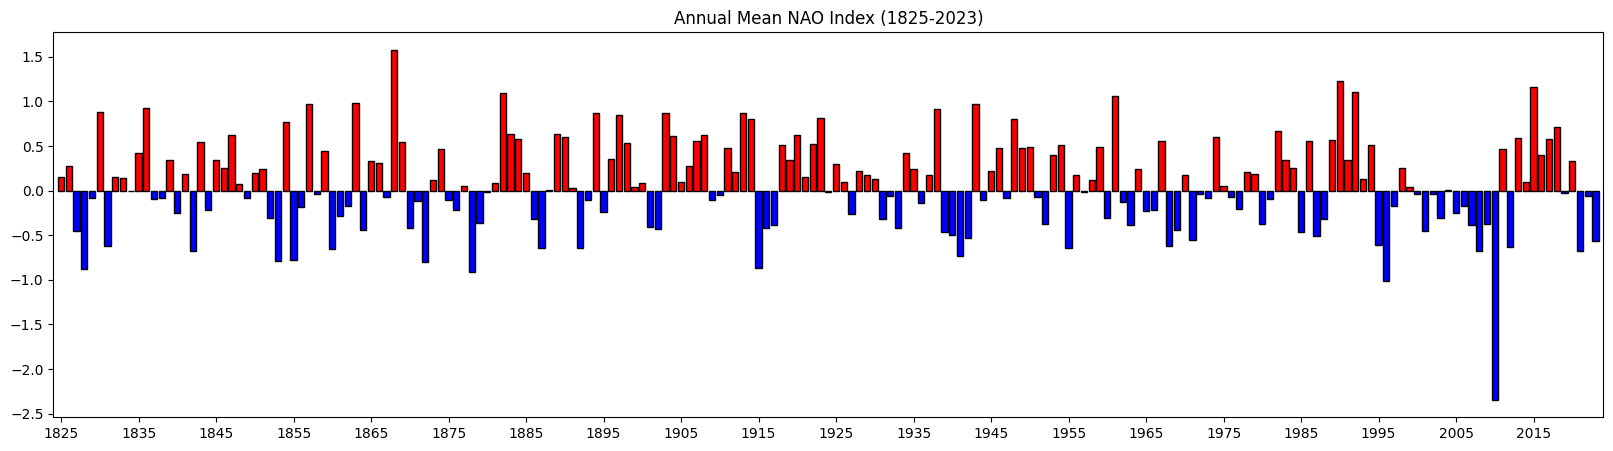

In [11]:
plt.figure(figsize=[20,5])
colors = ['red' if value > 0 else 'blue' for value in df_annual_means.Annual_mean]
plt.bar(np.arange(1825,2024,1),df_annual_means.Annual_mean,color=colors,edgecolor="k")
plt.xlim(1824,2024)
plt.xticks(ticks=np.arange(1825,2024,10))
plt.title("Annual Mean NAO Index (1825-2023)")

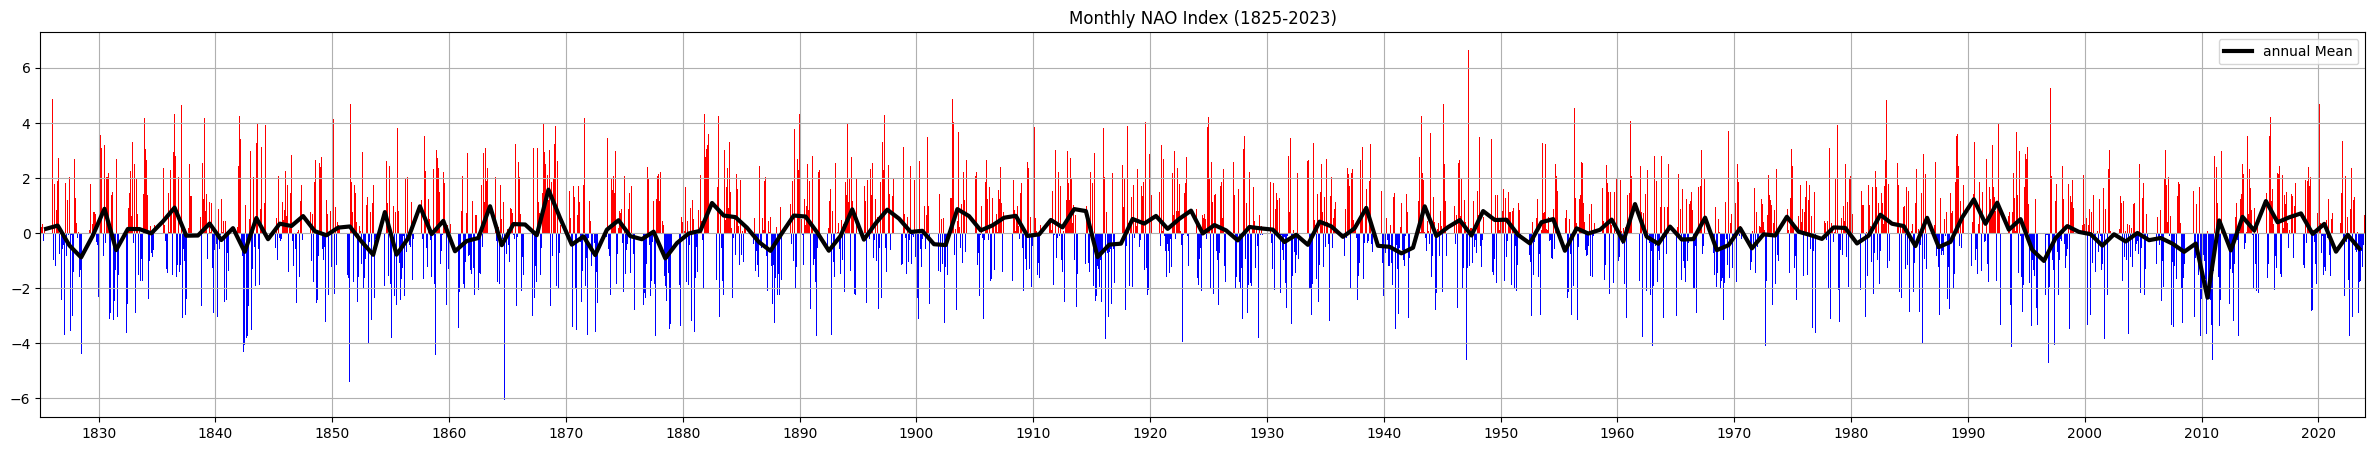

In [12]:
plt.figure(figsize=[30,5])
colors = ['red' if value > 0 else 'blue' for value in df_long.NAO_index]
plt.bar(np.arange(0,2388,1),df_long.NAO_index,color=colors)#,edgecolor="k")
plt.plot(np.arange(6,2388,12),df_annual_means.Annual_mean,color="k",linewidth=3,label="annual Mean")
plt.xlim(0,2388)
plt.xticks(ticks=np.arange(5*12,2388,120),labels=np.arange(1830,2024,10))
plt.legend()
plt.grid()
plt.title("Monthly NAO Index (1825-2023)");

In [94]:
# saving the datasets to csv:
#df_long.to_csv('NAO_INDEX_MONTHLY.csv', index=True)
#df_annual_means.to_csv('NAO_INDEX_ANNUAL.csv', index=True)

## Handling Missing Values

Missing Values occured in the years 1821-1824 (several months) and 2024 (all months after January), therefore we simply cut those years, now working with a complete set from 1825-2023.


In [13]:
# Check for missing values
df = df.replace(-99.990, pd.NA)
missing_values = df.isna().sum()
missing_values


Year         0
January      0
February     0
March        0
April        0
May          0
June         0
July         0
August       0
September    0
October      0
November     0
December     0
dtype: int64

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [14]:
st.describe(df_long["NAO_index"].values)

DescribeResult(nobs=2388, minmax=(-6.053, 6.659), mean=0.07629564489112228, variance=3.1118977550375813, skewness=0.05122373189001704, kurtosis=-0.17681193451225807)

In [16]:
st.describe(df_annual_means.Annual_mean)

DescribeResult(nobs=199, minmax=(-2.345, 1.578), mean=0.07625628140703516, variance=0.2698922420689305, skewness=-0.2936036183568939, kurtosis=1.5212719614836647)

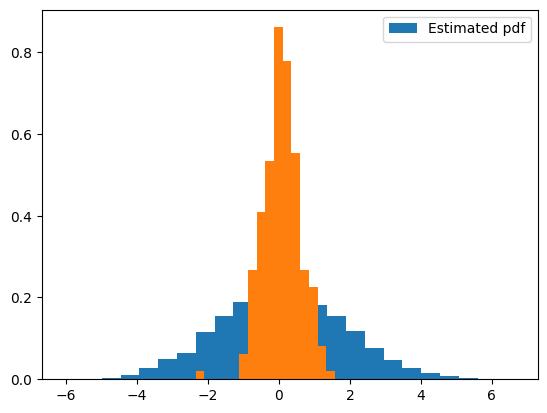

In [17]:
plt.hist(df_long["NAO_index"],bins=24,density=True,label="Estimated pdf")
plt.hist(df_annual_means.Annual_mean,bins=16, density=True)
plt.legend()
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
#autocorrelation maybe